In [1]:
import pandas as pd
import numpy as np
import scipy

from svm import SVMClassifier
import utils

In [2]:
class CrossValidate:

    def __init__(self, nb_samples, nb_folds, rand_seed=None):
        assert nb_samples > nb_folds, 'too few samples'
        self.nb_samples = nb_samples
        self.nb_folds = nb_folds

        self.set_indexes = list(range(self.nb_samples))

        if rand_seed is not False:
            np.random.seed(rand_seed)
            np.random.shuffle(self.set_indexes)

        self.iter = 0

    def __iter__(self):
        step = int(np.ceil(self.nb_samples / float(self.nb_folds)))
        for i in range(0, self.nb_samples, step):
            inds_test = self.set_indexes[i:i + step]
            inds_train = self.set_indexes[:i] + self.set_indexes[i + step :]
            yield inds_train, inds_test

    def __len__(self):
        return int(self.nb_folds)


def compute_cross_vals_score(model, X, y, nb_folds=10, X_inv=None):
    cv = CrossValidate(len(y), nb_folds)
    list_scores = []
    for i, (inds_train, inds_test) in enumerate(cv):
        print(i)
        model.fit(X[inds_train, :],  y[inds_train], X_inv=X_inv)
        score = model.score(X[inds_test, :], y[inds_test])
        list_scores.append(score)
    return np.mean(list_scores)




In [3]:
def get_X_inv(X, y):
    n_samples, n_features = X.shape
    if isinstance(X, np.ndarray) or isinstance(X, np.matrix):
        return X * -y[:, np.newaxis]
    elif isinstance(X, scipy.sparse.csr.csr_matrix):
        X_inv = X.copy()
        for i in range(n_samples):
            X_inv[i, :] = X_inv[i, :] * -y[i]
        return X_inv
    raise NotImplementedError

In [4]:
seqs = pd.read_csv('data/Xtr0.csv', header=None, names=['seq'])
labels = pd.read_csv('data/Ytr0.csv')
labels = labels.drop(labels.columns[[0]], axis=1)

In [5]:
X = utils.kgram_sparse_matrix(seqs, kgram_level=10, kgram_min=3)
y = labels.Bound.as_matrix()
y[y==0] = -1

X_inv = get_X_inv(X, y)

In [7]:
reg_params = np.linspace(0, 0.5)

best_score = -np.Inf
best_reg = 0
scores = []
for reg in reg_params:
    print(reg)
    model = SVMClassifier(reg_alpha=reg)
    score = compute_cross_vals_score(model, X, y, nb_folds=10, X_inv=X_inv)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_reg = reg

0.0
0


1


2


3


4


5


6


7


8


9


0.01020408163265306
0


1


2


3


4


5


6


7


8


9


0.02040816326530612
0


1


2


3


4


5


6


7


8


9


0.030612244897959183
0


1


2


3


4


5


6


7


8


9


0.04081632653061224
0


1


2


3


4


5


6


7


8


9


0.0510204081632653
0


1


2


3


4


5


6


7


8


9


0.061224489795918366
0


1


2


3


4


5


6


7


8


9


0.07142857142857142
0


1


2


3


4


5


6


7


8


9


0.08163265306122448
0


1


2


3


4


5


6


7


8


9


0.09183673469387754
0


1


2


3


4


5


6


7


8


9


0.1020408163265306
0


1


2


3


4


5


6


7


8


9


0.11224489795918366
0


1


2


3


4


5


6


7


8


9


0.12244897959183673
0


1


2


3


4


5


6


7


8


9


0.13265306122448978
0


1


2


3


4


5


6


7


8


9


0.14285714285714285
0


1


2


3


4


5


6


7


8


9


0.1530612244897959
0


1


2


3


4


5


6


7


8


9


0.16326530612244897
0


1


2


3


4


5


6


7


8


9


0.17346938775510204
0


1


2


3


4


5


6


7


8


9


0.18367346938775508
0


1


2


3


4


5


6


7


8


9


0.19387755102040816
0


1


2


3


4


5


6


7


8


9


0.2040816326530612
0


1


2


3


4


5


6


7


8


9


0.21428571428571427
0


1


2


3


4


5


6


7


8


9


0.22448979591836732
0


1


2


3


4


5


6


7


8


9


0.2346938775510204
0


1


2


3


4


5


6


7


8


9


0.24489795918367346
0


1


2


3


4


5


6


7


8


9


0.25510204081632654
0


1


2


3


4


5


6


7


8


9


0.26530612244897955
0


1


2


3


4


5


6


7


8


9


0.2755102040816326
0


1


2


3


4


5


6


7


8


9


0.2857142857142857
0


1


2


3


4


5


6


7


8


9


0.29591836734693877
0


1


2


3


4


5


6


7


8


9


0.3061224489795918
0


1


2


3


4


5


6


7


8


9
0.31632653061224486
0


1


2


3


4


5


6


7


8


9


0.32653061224489793
0


1


2


3


4


5


6


7


8


9


0.336734693877551
0


1


2


3


4


5


6


7


8


9


0.3469387755102041
0


1


2


3


4


5


6


7


8


9


0.3571428571428571
0


1


2


3


4


5


6


7


8


9


0.36734693877551017
0


1


2


3


4


5


6


7


8


9


0.37755102040816324
0


1


2


3


4


5


6


7


8


9


0.3877551020408163
0


1


2


3


4


5


6


7


8


9


0.39795918367346933
0


1


2


3


4


5


6


7


8


9


0.4081632653061224
0


1


2


3


4


5


6


7


8


9


0.4183673469387755
0


1


2


3


4


5


6


7


8


9


0.42857142857142855
0


1


2


3


4


5


6


7


8


9


0.4387755102040816
0


1


2


3


4


5


6


7


8


9


0.44897959183673464
0


1


2


3


4


5


6


7


8


9


0.4591836734693877
0


1


2


3


4


5


6


7


8


9


0.4693877551020408
0


1


2


3


4


5


6


7


8


9


0.47959183673469385
0


1


2


3


4


5


6


7


8


9


0.4897959183673469
0


1


2


3


4


5


6


7


8


9


0.5
0


1


2


3


4


5


6


7


8


9


In [9]:
print(best_score)
print(best_reg)

0.7235
0.2040816326530612


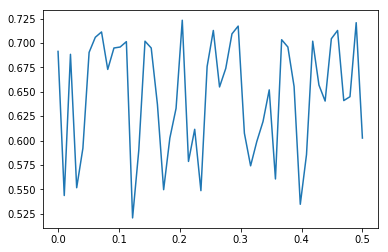

In [12]:
import matplotlib.pyplot as plt

plt.plot(reg_params, scores)
plt.savefig('doc/imgs/reg_weight_accuracy.png')